In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing necessary libraries

In [30]:
import numpy as np
import os
import random
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

### Define dataset path

In [16]:
dataset_path = "Dataset"

### Visualizing the images and Resize images

C:\Users\pc\AppData\Local\Temp\ipykernel_2072\4100823921.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


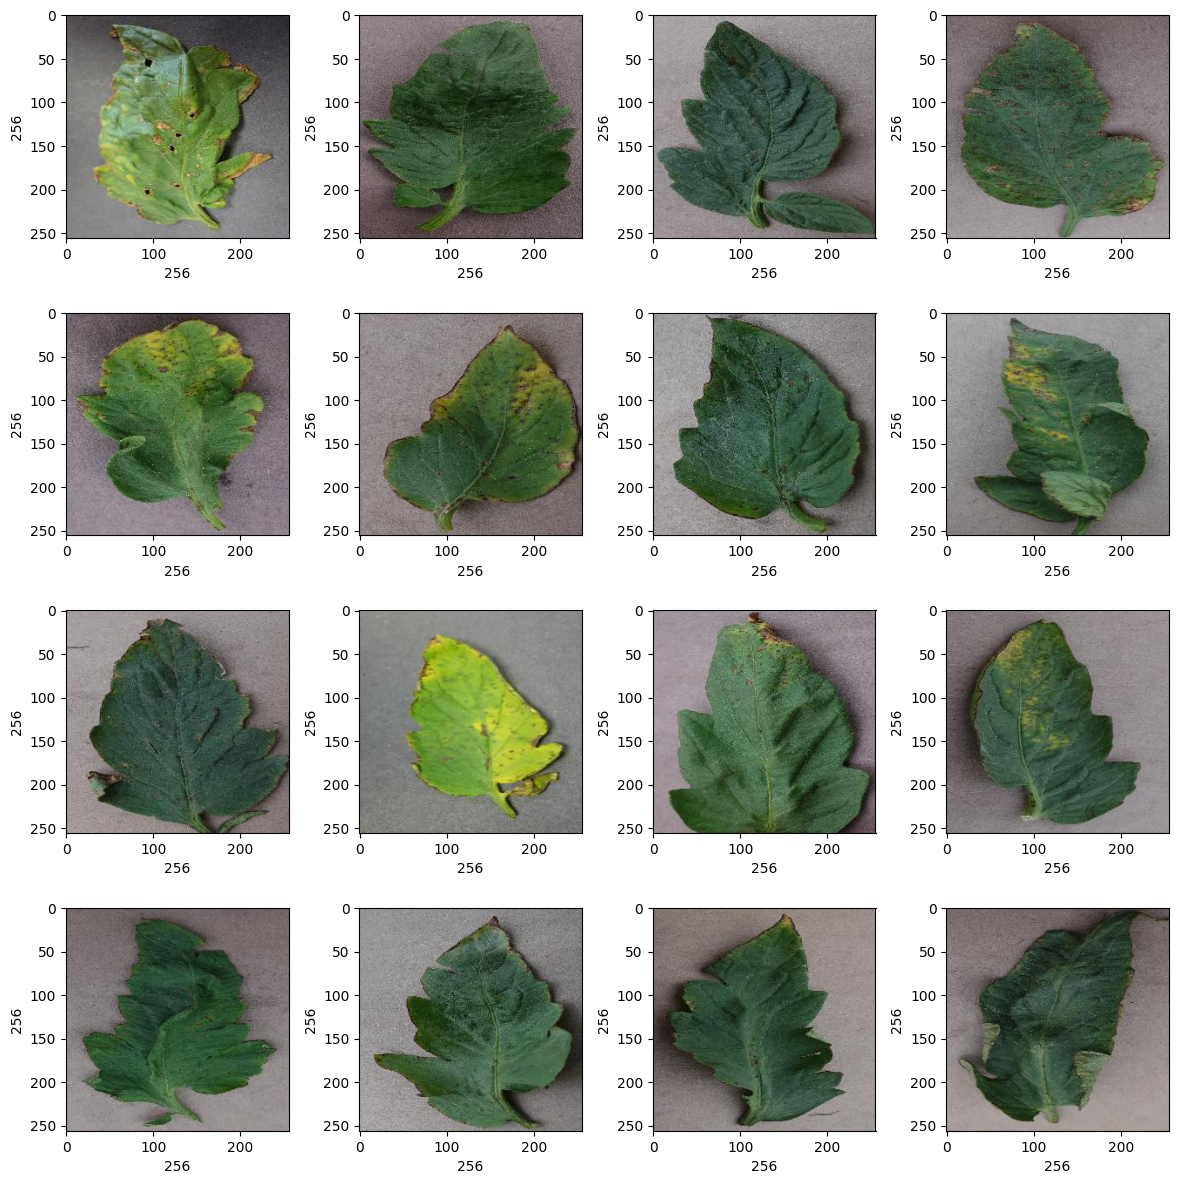

In [18]:
# Plotting 12 images to check dataset

plt.figure(figsize = (12, 12))
dataset_path = "Dataset\Tomato___Bacterial_spot"

for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.tight_layout()
    rand_img = imread(dataset_path +'/'+ random.choice(sorted(os.listdir(dataset_path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10) # width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10) # height of image

### Load images using ImageDataGenerator

In [32]:
batch_size = 32
image_size = (256, 256)

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 7033 images belonging to 10 classes.
Found 1757 images belonging to 10 classes.


### Define CNN model architecture

In [33]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

### Compile the model

In [34]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Train the model

In [35]:
history = model.fit(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
220/220 [==============================] - 20s 83ms/step - loss: 0.7838 - accuracy: 0.6979 - val_loss: 0.5148 - val_accuracy: 0.7945
Epoch 2/20
220/220 [==============================] - 19s 86ms/step - loss: 0.3980 - accuracy: 0.8433 - val_loss: 0.3838 - val_accuracy: 0.8412
Epoch 3/20
220/220 [==============================] - 18s 82ms/step - loss: 0.2972 - accuracy: 0.8840 - val_loss: 0.2441 - val_accuracy: 0.9129
Epoch 4/20
220/220 [==============================] - 19s 88ms/step - loss: 0.2432 - accuracy: 0.9097 - val_loss: 0.2476 - val_accuracy: 0.9220
Epoch 5/20
220/220 [==============================] - 18s 82ms/step - loss: 0.2179 - accuracy: 0.9232 - val_loss: 0.2052 - val_accuracy: 0.9283
Epoch 6/20
220/220 [==============================] - 20s 89ms/step - loss: 0.1720 - accuracy: 0.9362 - val_loss: 0.1555 - val_accuracy: 0.9431
Epoch 7/20
220/220 [==============================] - 18s 81ms/step - loss: 0.1698 - accuracy: 0.9399 - val_loss: 0.2329 - val_accuracy:

### Evaluate the model

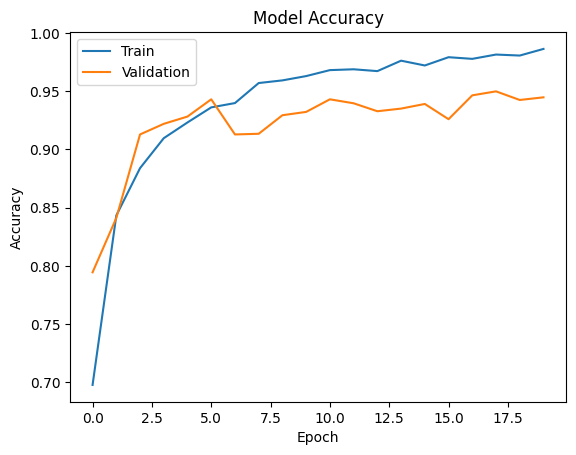

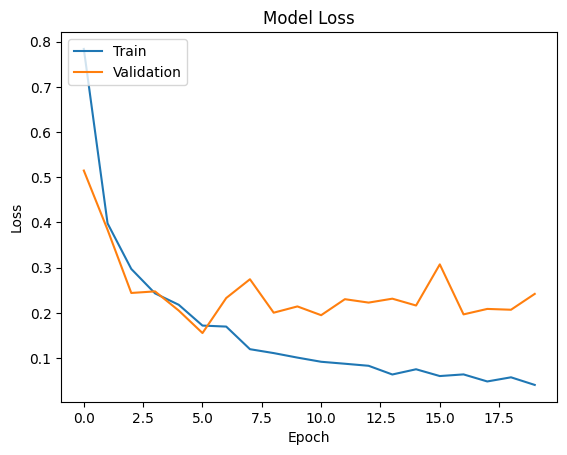

In [37]:
# Plotting training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# Plotting training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [38]:
test_loss, test_acc = model.evaluate(validation_generator)
print("Test accuracy:", test_acc)

55/55 [==============================] - 3s 59ms/step - loss: 0.2420 - accuracy: 0.9448
Test accuracy: 0.9447922706604004


## Save the model

In [39]:
model.save("tomato_disease_detection_model.h5")